# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\MYVNSandeepKumar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


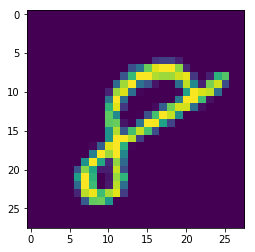

In [26]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[59999])

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [10]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(32,3,3,activation ='relu', input_shape = (28,28,1)))
model.add(Convolution2D(32,3,3,activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,3,3,activation ='relu'))
model.add(Convolution2D(64,3,3,activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1, activation='relu')) #5*5*10
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

C:\Users\MYVNSandeepKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MYVNSandeepKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
C:\Users\MYVNSandeepKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
C:\Users\MYVNSandeepKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 10)          650       
__________

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=1)

C:\Users\MYVNSandeepKumar\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
60000/60000 [==============================] - 190s 3ms/step - loss: 0.2992 - acc: 0.9060
Epoch 2/20
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0713 - acc: 0.9774
Epoch 3/20
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0493 - acc: 0.9851
Epoch 4/20
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0386 - acc: 0.9885
Epoch 5/20
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0323 - acc: 0.9902
Epoch 6/20
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0284 - acc: 0.9910
Epoch 7/20
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0246 - acc: 0.9925
Epoch 8/20
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0212 - acc: 0.9931
Epoch 9/20
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0189 - acc: 0.9937
Epoch 10/20
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0164 - a

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.04119752720832262, 0.9911]


In [16]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.29709647e-22 1.70446667e-16 8.97210881e-18 4.73227347e-14
  6.48141570e-29 2.49991510e-21 3.03817005e-38 1.00000000e+00
  1.97014010e-22 1.44448933e-15]
 [2.07461007e-10 4.86644558e-10 1.00000000e+00 1.35264778e-13
  1.16970486e-19 2.27403001e-20 1.90933207e-11 7.75658973e-21
  1.57212776e-09 6.79592268e-26]
 [4.72373460e-11 9.99998689e-01 2.24936347e-10 2.27623495e-17
  2.62908650e-09 2.30232691e-11 4.84308357e-11 1.25630470e-06
  9.31520226e-12 9.14032825e-12]
 [1.00000000e+00 3.04362988e-18 1.11741640e-11 7.61737722e-18
  9.11304674e-19 5.76220929e-13 1.31343603e-10 2.23802524e-18
  3.79502541e-14 2.57004175e-11]
 [3.53725089e-21 1.93409955e-09 4.55623046e-16 3.90056553e-19
  9.99997616e-01 3.37839769e-14 9.65773685e-14 4.91360594e-15
  6.07555943e-13 2.39018232e-06]
 [8.38446500e-12 9.99996305e-01 1.10806385e-10 3.26780415e-19
  4.07503734e-07 3.99638628e-13 2.61610698e-11 3.37477127e-06
  2.21661387e-11 4.76099889e-11]
 [4.26741078e-31 5.03393949e-08 1.37589457e-13 1.33366620e

In [18]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x242c385c550>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x242c3793710>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x242c3793358>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x242c3776978>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x242c37a6320>,
 'conv2d_5': <keras.layers.convolutional.Conv2D at 0x242ccbf1470>,
 'conv2d_6': <keras.layers.convolutional.Conv2D at 0x242c3836a90>,
 'flatten_1': <keras.layers.core.Flatten at 0x242c38486a0>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x242c3776cc0>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x242c37fd710>}

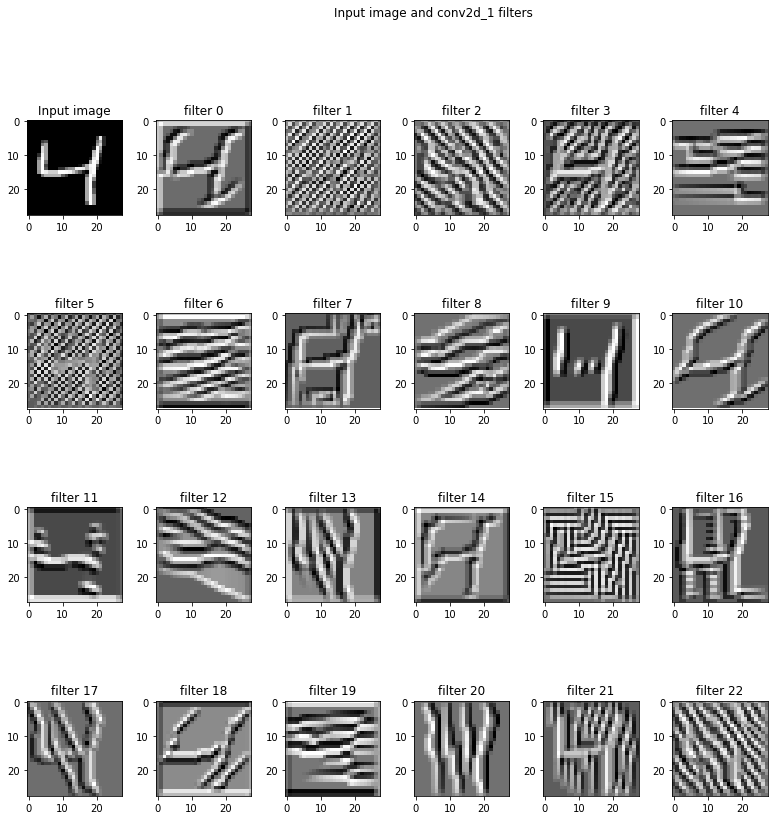

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()